# SIMPLE LINEAR REGRESSION

#### Business Problem


*  Apply the simple linear regression model for the data set package recieved by the students. 
*  Decide whether there is a significant relationship between the variables in the linear regression model of the data set placement at 5% (alpha) significance level.

#### conditions :
    1) Data required for regression problem is numerical.
    2) In Simple Linear Regression there should be only 1 independent variable (X-Variable).
    3) The data should accept all the assumptions in the linear regression.
    4) Train data accuracy should be more than 70 % , so that we can apply the algorithm on Test Data. 

# Step 1 :- Import Important Libraries

In [4]:
################################## Data Analysis & Calculation ##################################
import pandas as pd  
import numpy as np  

############# Data Visualization ###############
import seaborn as sns  
import matplotlib.pyplot as plt 
%matplotlib inline

#################### Model Building & data partition #####################
import statsmodels.api as sm 
from statsmodels.stats import diagnostic as diag 
from sklearn.model_selection import train_test_split 

# Step 2 :- Data Import

In [5]:
placement = pd.read_csv(r"C:\Users\admin\Desktop\Machine Learning\Linear Regression\Simple Linear Regression\Problem 2\placement.csv") 

# Looking at the first five rows
placement.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [6]:
# Looking at the last five rows
placement.tail()

,cgpa,package
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96
199,6.22,2.33


# Step 3 :- Data Cleaning

In [7]:
# What type of values are stored in the columns?
placement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cgpa     200 non-null    float64
 1   package  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


* Data is numerical and has cgpa as Independent Variable and package as Dependent Variable.

 # Univariate Analysis

In [8]:
# Let's look at some statistical information about
#our dataframe.
placement.describe()

,cgpa,package
count,200.000000,200.000000
mean,6.990500,2.996050
std,1.069409,0.691644
min,4.260000,1.370000
25%,6.190000,2.487500
50%,6.965000,2.995000
75%,7.737500,3.492500
max,9.580000,4.620000


# Identify & Treatment of Outlier 

<AxesSubplot:>

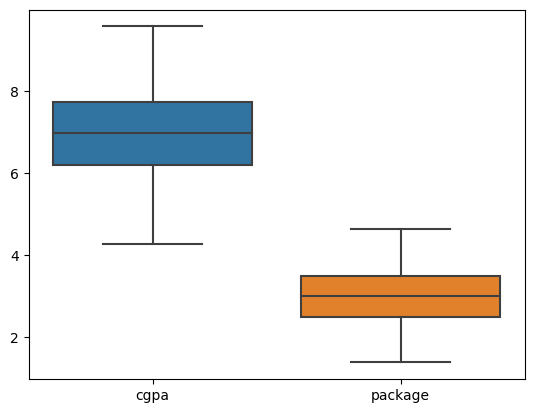

In [9]:
sns.boxplot(data=placement)

* No outliers present in the data.

* If outliers present in the data use one of the following method to remove outliers:
        1) Winsorizing Technique
        2) Feature Scaling:
            i)  Standard Scaler
            ii) Minmax Method

## Missing Value

In [10]:
# Do we have NA's in data
placement.isna().sum()

cgpa       0
package    0
dtype: int64

* No missing values present in the data
* If missing values present in numerical data, use one of the following method to remove Null values:
        1) If missing values are less, remove it.
        2) If missing values are more, replace it with the mean of that specified column.

# Step 4 :- Data Partition 

* Split the data into 2 parts: Train Data and Test Data
        1) Train Data : The data on which we apply our algorithm for testing purpose.
        2) Test Data  : The data on which we apply algorithm after we get more than 70 % accuracy on trian data.
* Train Data include 70 % of the total data.
* Test Data include 30 % of the total data.

In [10]:
x=placement[['cgpa']]     # Independent Variable
y=placement[['package']]  # Dependent Variable

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x,y,train_size=0.7,random_state=100)

# train_size=0.7    = Train Data include 70 % of the total data.
# random_state=100  = It is the location where our random train and test data has been saved.

In [11]:
train = pd.concat([X_train,y_train], axis=1)
train.head()

,cgpa,package
74,6.85,3.44
3,7.42,3.67
185,6.31,3.18
26,8.31,3.42
90,7.11,2.66


# Step 5 :-  Correlation 

##### There are 2 methods to find the correlation between numerical variables:
        1) Scatter Plot :
            - It shows weather the relation is Positive(Upward Linear Direction) or Negetive(Downward Linear Direction).
            - It shows only direction not the value.
        2) Correlation Matrix or Heatmap :
            - It shows weather the relation is Positive(Upward Linear Direction) or Negetive(Downward Linear Direction)
              as well as shows percentage of correlation.
            - It shows Direction as well as percentage value.
            - Correlation has a range of -1 to +1.
            - Between (-1 to 0) =  Negetive Correlation
            - Between (0 to +1) =  Positive Correlation
            - If value is more than -0.7 then it is a strong negetive correlation.
            - If value is more than 0.7 then it is a strong positive correlation.          

### Scatter Plot ( Bi-variate Analysis)

<AxesSubplot:xlabel='cgpa', ylabel='package'>

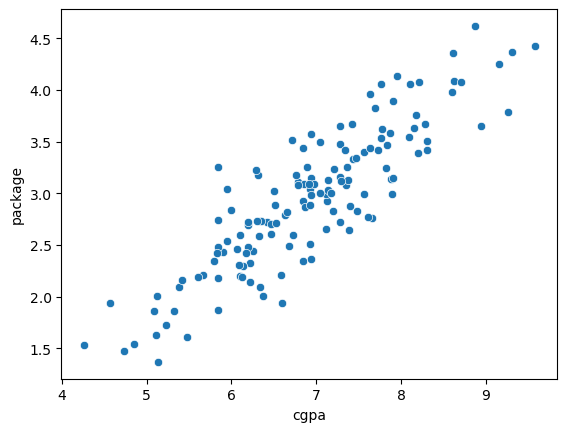

In [12]:
sns.scatterplot(x='cgpa', y='package',data=train)

#### Scatter Plot shows that the cgpa (Independent Variable) has a positive correlation with package (Dependent Variable) .

### Correlation Matrix

In [13]:
train.corr()

,cgpa,package
cgpa,1.000000,0.877333
package,0.877333,1.000000


<AxesSubplot:>

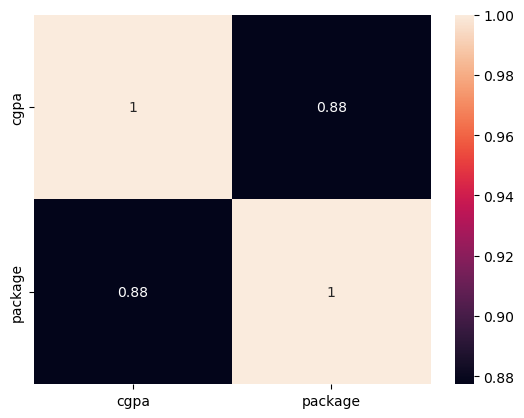

In [14]:
sns.heatmap(train.corr(),annot = True)

#### Heatmap shows 88 % strong Positive correlation between CGPA & Package.

# Step 6 :- Model Building 

### Hypotheis Testing

* H0 : - There is no significant relationship between the CGPA & Package.
                    Vs
* H1 : -There is a significant relationship between the CGPA & Package

Alpha = 5% ( 0.05 )

In [15]:
import statsmodels.formula.api as smf
model = smf.ols('package ~ cgpa', data=train).fit()  # ols = ordinary least square
model.summary()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                package   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     461.3
Date:                Thu, 29 Dec 2022   Prob (F-statistic):           7.65e-46
Time:                        18:54:01   Log-Likelihood:                -42.640
No. Observations:                 140   AIC:                             89.28
Df Residuals:                     138   BIC:                             95.16
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0740      0.189     -5.676      0.000      -1.448      -0.700
cgpa           0.5812      0.027     21.477      0.000       0.528       0.635
==============================================================================
Omnibus:                        0.263   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.877   Jarque-Bera (JB):                0.334
Skew:                           0.101   Prob(JB):                        0.846
Kurtosis:                       2.871   Cond. No.                         48.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Conclusion 

* We Reject Ho  (p-value of cgpa is less than 0.05 hence, we regret Null Hypothesis)
* There is  relationship between the CGPA & Package
* Accuracy of Model is 77%, So Model is Good Fit 

#### Equation of Simple Linear regression is :  Y = b0 + b1(X)
* b0 = Intercepnt of Y
* b1 = Coeffiecient of Y
        Y = Intercept + (Coeffiecient of Y)(cgpa)
        Y = b0 + b1(X)
        Y = -1.0740 + 0.5812 * (cgpa)

# Step 7 :- Assumption of Model

    1) Linearity
    2) Homoscedasicity -- ( Constant Variance )
    3) Normality
    4) Model Error has to be independently identificaly Distibuted

## 1) Linearity

<AxesSubplot:xlabel='cgpa', ylabel='package'>

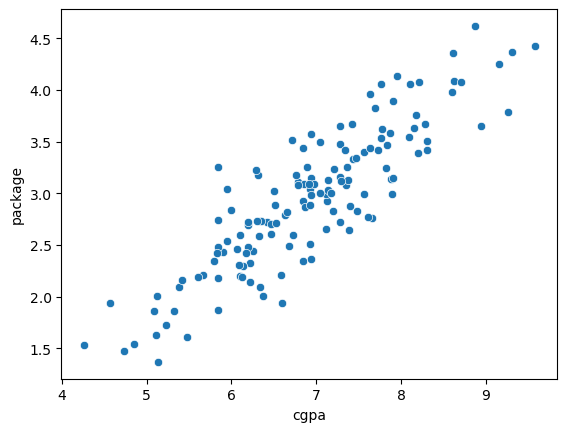

In [17]:
sns.scatterplot(x='cgpa', y='package',data=train)

In [18]:
train.head()

,cgpa,package
74,6.85,3.44
3,7.42,3.67
185,6.31,3.18
26,8.31,3.42
90,7.11,2.66


In [19]:
# y = Beta0 + Beta 1 * cgpa
y=  -1.0740 + 0.5812 * 6.85
y

2.9072199999999997

* fitted_value  = Predicited Value
* residual = error value (Orignal Value - Predicted Value)

In [20]:
train['fitted_value']=model.fittedvalues # prediction  or fitted value
train['residual']=model.resid  # error or residual

train.head()

,cgpa,package,fitted_value,residual
74,6.85,3.44,2.907505,0.532495
3,7.42,3.67,3.238813,0.431187
185,6.31,3.18,2.593634,0.586366
26,8.31,3.42,3.756119,-0.336119
90,7.11,2.66,3.058628,-0.398628


## 2) Homoscedasicity ( Constant Variance )

<AxesSubplot:xlabel='fitted_value', ylabel='residual'>

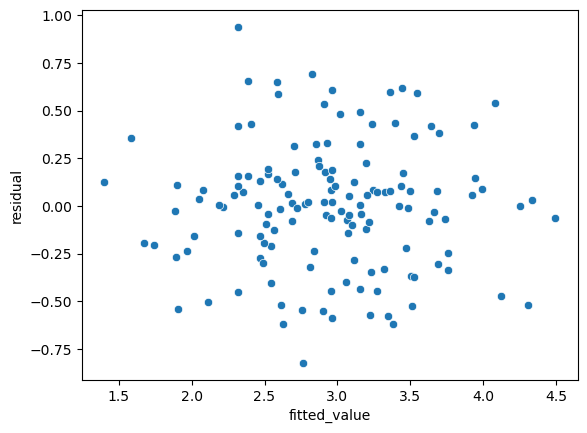

In [21]:
sns.scatterplot(x='fitted_value', y='residual',data=train)

## 3) Normality 

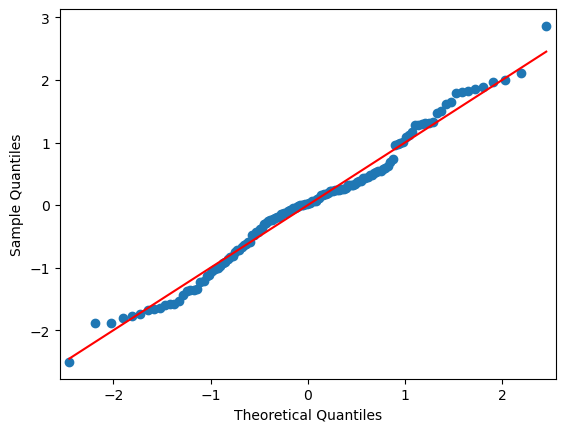

In [22]:
fig = sm.qqplot(train['residual'], fit=True, line='s') #qqplot quartile quartile plot

# s indicate standardized line
plt.show()

## 4) Model Error are IID 

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


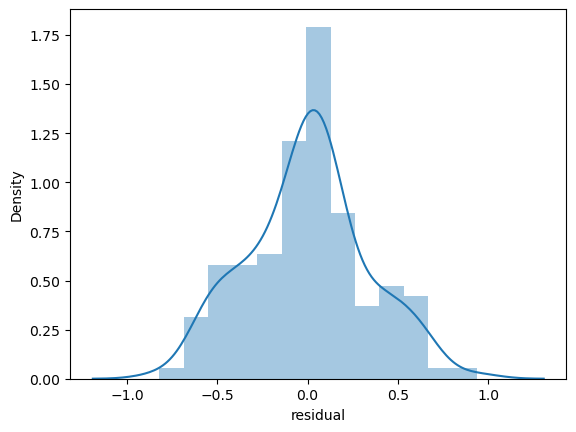

In [23]:
ax = sns.distplot(train.residual) 

* Data is Normal

# Step 8:- Prediction on Test Data (unseen data)

In [24]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,cgpa,package
126,5.91,2.60
104,7.62,3.74
99,6.61,3.24
92,7.90,4.00
111,5.42,2.25


In [25]:
y= -1.0740 + 0.5812 * 7.62 # manual 
y

3.354744

In [26]:
test['Predicted']=model.predict(test)
test

,cgpa,package,Predicted
126,5.91,2.60,2.361137
104,7.62,3.74,3.355062
99,6.61,3.24,2.768007
92,7.90,4.00,3.517809
111,5.42,2.25,2.076328
167,8.13,3.60,3.651495
116,9.04,3.33,4.180426
96,7.11,2.61,3.058628
52,8.37,4.11,3.790993
69,7.30,2.94,3.169064


# Train

In [29]:
from sklearn.metrics import r2_score
r2 = r2_score(train.package, train.fitted_value)
print('r2 score for perfect model is', np.round(r2,2))

r2 score for perfect model is 0.77


* Accuracy on Train Data is 77 %
* Hence, Model is good fit model.

# Test

In [28]:
from sklearn.metrics import r2_score
r2 = r2_score(test.package, test.Predicted)
print('R2 score for model Performance on Test', np.round(r2,2))

R2 score for model Performance on Test 0.78


* Accuracy on Test Data is 78 %
* Hence, Model is good fit model.

# Step 9:- Prediction for Live Data  -- Population  (Optional)

In [28]:
d1 = {'Student':pd.Series(['Tejas', 'Yash', 'Sarang']),
     'cgpa':pd.Series([9.6, 9.1, 8.3])}
live = pd.DataFrame(d1)
live

,Student,cgpa
0,Tejas,9.6
1,Yash,9.1
2,Sarang,8.3


In [29]:
live['future Prediction']=np.round(model.predict(live))
live

,Student,cgpa,future Prediction
0,Tejas,9.6,5.0
1,Yash,9.1,4.0
2,Sarang,8.3,4.0


# Finish